In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_path = "../data/one_sentence/question72_len21_size36.csv"
"../data/one_sentence/question13_len4_size104.csv"

'../data/one_sentence/question13_len4_size104.csv'

In [3]:
og = pd.read_csv(
    dataset_path
)

In [4]:
import sentence_to_feature as stfu
answer = og.iloc[0,1]
sw_answer = stfu.stem_sentence(answer)

In [5]:
og['reduced'] = og.student_answer.apply(stfu.stem_sentence)
og['ordered'] = og.reduced.apply(stfu.order_sentence)

og.tail(15)

,student_answer,teacher_answer,label,question_id,reduced,ordered
22,It is in both the same circuit.,The circuit does not include both contact poin...,0,72,circuit,circuit
23,The light bulb needs both plus and minus to be...,The circuit does not include both contact poin...,1,72,light bulb need plu minu differ part holder,bulb differ holder light minu need part plu
24,It is not connected.,The circuit does not include both contact poin...,0,72,connect,connect
25,More power goes to the motor.,The circuit does not include both contact poin...,0,72,power goe motor,goe motor power
26,The wires are not connecting to the bulb.,The circuit does not include both contact poin...,0,72,wire connect bulb,bulb connect wire
27,The bulb will not light because the positive a...,The circuit does not include both contact poin...,1,72,bulb light posit neg wire hook hook,bulb hook hook light neg posit wire
28,It does not work because the wire are not prop...,The circuit does not include both contact poin...,0,72,work wire propel spring thing,propel spring thing wire work
29,Yes even though it is not a complete circuit.,The circuit does not include both contact poin...,0,72,ye complet circuit,circuit complet ye
30,No because both wires are on both place.,The circuit does not include both contact poin...,0,72,wire place,place wire
31,Some of the wires are disconnect.,The circuit does not include both contact poin...,0,72,wire disconnect,disconnect wire


In [70]:
og['wordcount'] = og.reduced.apply(stfu.word_count)
og['j_similarity'] = og.reduced.apply(lambda x: stfu.jaccard_similarity(x, sw_answer))
og['s_similarity'] = og.reduced.apply(lambda x: stfu.spacy_similarity(x, sw_answer))
og.head()

C:\Users\imcna\AppData\Local\Programs\Python\Python38\Lib\runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return _run_code(code, main_globals, None,


,student_answer,teacher_answer,label,question_id,reduced,wordcount,j_similarity,s_similarity
0,It will not get light because the negative is ...,The circuit does not include both contact poin...,0,72,light neg get motor,4,0.000000,0.650895
1,It will not light because one wire has to go i...,The circuit does not include both contact poin...,1,72,light wire wire,3,0.000000,0.675532
2,There is not 2 wires for each little clip. The...,The circuit does not include both contact poin...,1,72,2 wire littl clip need come clip come clip,9,0.000000,0.548352
3,The bulb will not light because one of the wir...,The circuit does not include both contact poin...,1,72,bulb light wire touch clip,5,0.090909,0.812533
4,Because the electricity is going to the motor.,The circuit does not include both contact poin...,0,72,electr go motor,3,0.111111,0.517454


In [6]:
og = stfu.single_entity_extraction(og, 'reduced', sw_answer)

In [9]:
og.tail(15)

,student_answer,teacher_answer,label,question_id,reduced,ordered,has_circuit,has_includ,has_contact,has_point,has_bulb,has_holder,has_electr
22,It is in both the same circuit.,The circuit does not include both contact poin...,0,72,circuit,circuit,1,0,0,0,0,0,0
23,The light bulb needs both plus and minus to be...,The circuit does not include both contact poin...,1,72,light bulb need plu minu differ part holder,bulb differ holder light minu need part plu,0,0,0,0,1,1,0
24,It is not connected.,The circuit does not include both contact poin...,0,72,connect,connect,0,0,0,0,0,0,0
25,More power goes to the motor.,The circuit does not include both contact poin...,0,72,power goe motor,goe motor power,0,0,0,0,0,0,0
26,The wires are not connecting to the bulb.,The circuit does not include both contact poin...,0,72,wire connect bulb,bulb connect wire,0,0,0,0,1,0,0
27,The bulb will not light because the positive a...,The circuit does not include both contact poin...,1,72,bulb light posit neg wire hook hook,bulb hook hook light neg posit wire,0,0,0,0,1,0,0
28,It does not work because the wire are not prop...,The circuit does not include both contact poin...,0,72,work wire propel spring thing,propel spring thing wire work,0,0,0,0,0,0,0
29,Yes even though it is not a complete circuit.,The circuit does not include both contact poin...,0,72,ye complet circuit,circuit complet ye,1,0,0,0,0,0,0
30,No because both wires are on both place.,The circuit does not include both contact poin...,0,72,wire place,place wire,0,0,0,0,0,0,0
31,Some of the wires are disconnect.,The circuit does not include both contact poin...,0,72,wire disconnect,disconnect wire,0,0,0,0,0,0,0


## Quick Graph

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

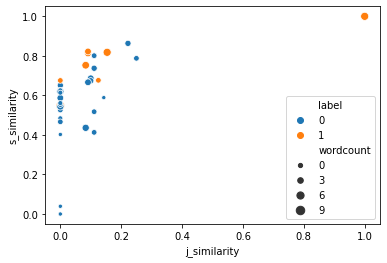

In [72]:
sns.scatterplot(
    og.j_similarity,
    og.s_similarity,
    hue = og.label,
    size = og.wordcount
)
plt.show()